## Import all the relevant Modules 

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.  ]


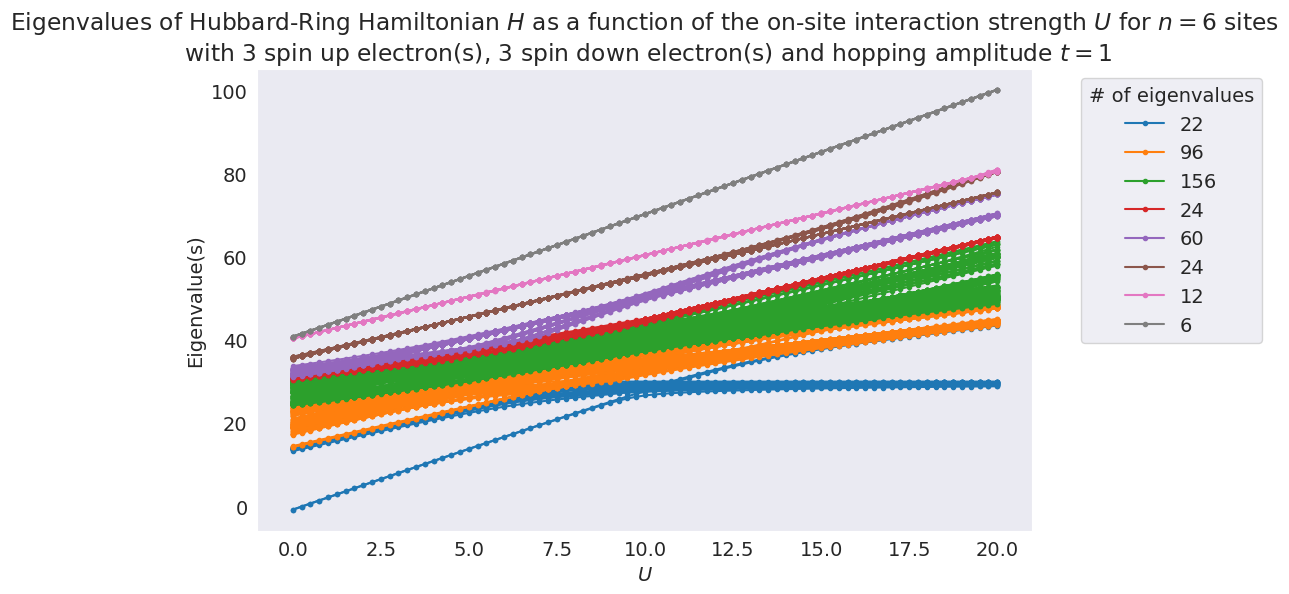

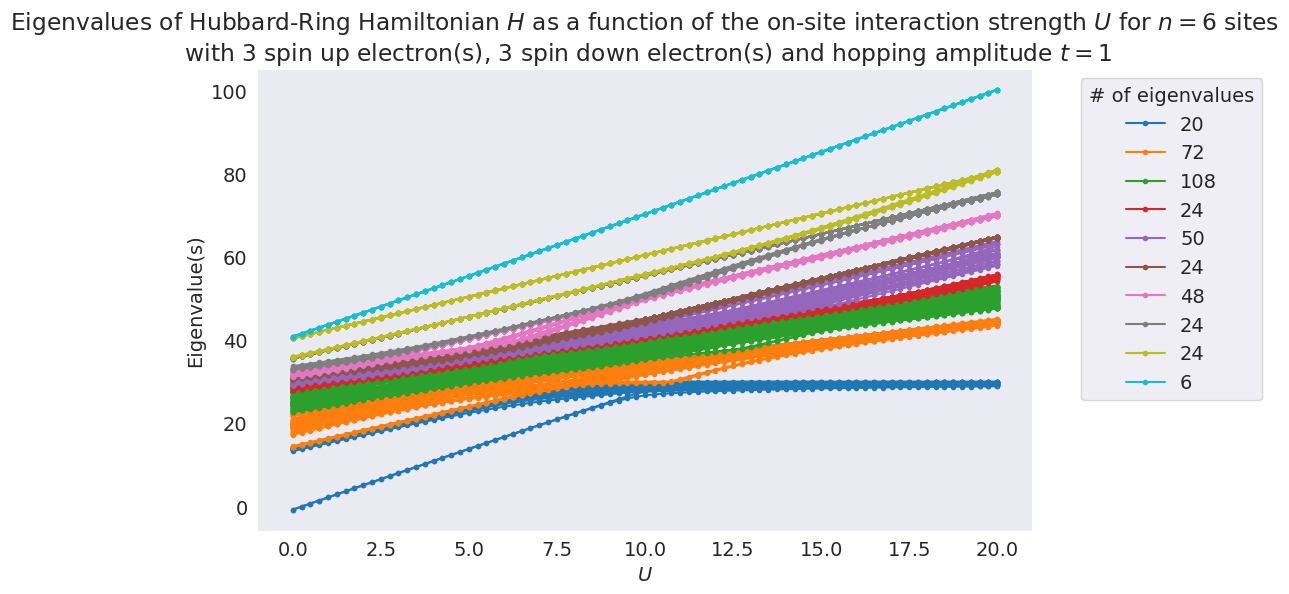

In [1]:
%matplotlib inline

import Modules.Hubbard_Model.Module_Hubbard_Class as hb
from Modules.General.Module_Widgets_and_Sliders import Text_Box, Save_Figure_Button, Click_Save_Figure, set_filename

# default Jupyter widgets
import ipywidgets as widgets
from ipywidgets import HBox, VBox

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})
sns.set_style("darkgrid")

# for printlength and save figures button
import functools
import numpy as np
np.set_printoptions(linewidth=150) #set output length, default=75

# to avoid reloading all widgets after changing single Slider/Textbox/...
def close_widgets(DIR) -> None:
    """Close all widgets `wi`, displays `di` and UserInterfaces `UI` in notebook directory `dir()`."""
    for i in range(100):
        if f"w{i}" in DIR:
            exec(f"w{i}.close()")
        if f"d{i}" in DIR:
            exec(f"d{i}.close()")
        if f"UI{i}" in DIR:
            exec(f"UI{i}.close()")
            

%load_ext autoreload
%autoreload 2

# Lattice Quantum Field Theory (QFT)
<!---  Define a few convenience macros for bra-ket notation. -->
$\newcommand{\ket}[1]{\left\vert{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right\vert}$
$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$
$\newcommand{\dyad}[2]{\left|{#1}\middle\rangle\middle\langle{#2}\right|}$
$\newcommand{\mel}[3]{\left\langle{#1}\vphantom{#2#3}\right|{#2}\left|{#3}\vphantom{#1#2}\right\rangle}$
$\newcommand{\expval}[1]{\left\langle{#1}\right\rangle}$
$\newcommand\dif{\mathop{}\!\mathrm{d}}$
$\newcommand\ii{\mathrm{i}}$
$\newcommand{\coloneqq}{\mathop{:=}}$
$\newcommand{\abs}[1]{\left\vert{#1}\right\vert}$
$\newcommand{\vb}[1]{\mathbf{#1}}$

We will now use methods from QFT to describe the dynamics of a quantum system on lattice. Contrary to the previous notebooks, where we used QM to describe each particles path through space, we will now use QFT to describe the states of space points. This naturally leads to second quantization, a method in which we do not ask "which particles are in which states," but rather "how many particles are in each state".

To simplify our model, we assume our electrons to live on discrete points in space, i.e. on a lattice. Further, as we deal with fermions, the Pauli exclusion principle dictates that a single site can be occupied by no more than two electrons (one with spin up and one with spin down). Consequently, each site can be in one of four states: zero electrons, one up, one down, or up and down. Thus the total number of possible states grows exponentially with the number of sites $n$, as $4^n$. These states are called Fock states or states in the occupation number basis.

# Hubbard model

We use the so called Hubbard model to describe the dynamics of a system of electrons on a lattice. The model's Hamiltonian is defined as follows:

$$ \large
H = t \sum_{\langle ij \rangle, \sigma}  c_{i,\sigma}^\dagger c_{j,\sigma} + U \sum_{i} n_{i, \uparrow} n_{i, \downarrow} + U_1 \sum_{i} \left(n_{i, \uparrow} + n_{i \downarrow}\right) \left(n_{i+1, \uparrow} + n_{i+1,\downarrow}\right) ,
$$
where $\langle ij \rangle$ denotes nearest neighbor hopping, the spin $\sigma \in \{\frac{1}{2}, -\frac{1}{2}\} = \{\uparrow, \downarrow\}$, $\large c_{i,\sigma}^\dagger$ and $\large c_{j,\sigma}$ is an electron creation and annihilation operator, respectively, and $\large n_{i \uparrow}$ and $\large n_{i \downarrow}$ are the occupation number operators at site $i$. The latter are zero if no electron with spin $\sigma$ is at site $i$ and one else.

The first term $H_t$ describes electron hopping from site $j$ to $i$ with coupling $t$ (hopping amplitude). The second term $H_U$ models the electron-electron repulsion at site $i$ with on-site interaction strength $U$. The third term $H_{U_1}$ describes the electron-electron repulsion between nearest neighbor sites $i$ and $i+1$ with coupling strength $U_1$.

# The Fock Basis states 
Our Hamiltonian $H$ has an equal number of creation and annihilation operators in each term, implying that we cannot change the number of electrons in our system when acting with $H$. Almost the same reasoning ($\sigma$ does not change via $c^\dagger$ and $c$) conserves the number of spin up and down electrons, individually. We can therefore reduce the number of Fock states by considering only those with a fixed number of spin up and down electrons (e.g. for diagonalizing $H$). Hence we only need to consider $\large \binom{n}{s_\mathrm{up}} \binom{n}{s_\mathrm{down}}$ basis states instead of $4^n$

Numerically we can label a basis state via a $2n$-dimensional binary array, where the first $n$ indices label the spin up states of site $i$ and the second $n$ label the spin down sites. For example the basis vector $[1,0,0,0,1,1]$ would correspond to a $n=3$ sited problem with one up electron on site 1 and two down electrons on sites 2 and 3.

In the Widget below the total number of Fock basis states as well an individual one are displayed. One can change the number of sites $n \leq 7$, the number of electrons per site $s_\mathrm{up}$ and $s_\mathrm{down}$ and which `State` to show.

In [2]:
# Create a Hubbard model, has to be done before widgets can be executed!
h1 = hb.Hubbard()

#layout of widgets
box_layout = widgets.Layout(border='solid 2px')

In [3]:
close_widgets(dir())
w1 = widgets.interactive(h1.show_basis, index=h1.basis_index, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

display(w1)

interactive(children=(BoundedIntText(value=6, description='State =', layout=Layout(width='3cm'), max=399, styl…

# Hopping Hamiltonian

In the Widget below one can play around with the number of sites $n$, spin up and spin down states, as well as the interaction strength $U$ and the hopping amplitude $t$ to explore the Hamiltonian $H$. Note that only for $n \leq 4$ the complete matrix can be fully displayed. Note the different signs for the hopping terms.


One can also use the `Use t_ij input file` Checkbox to extend the simple nearest neighbor hopping with constant hopping amplitude $t$ to some arbitrary hopping from site $i$ to site $j$ with hopping amplitude $t_{ij}$.

The input file is a comma separated list of floating point numbers $t_{ij}$ located in the `Modules/Hubbard_Model/t_ij` folder. For each number of sites `n` the file `n<number-of-sites>.txt` is used when ticking the checkbox. Per default these files use constant nearest neighbor hopping with $t_{<ij>}=1$ and constant next neighbor hopping with $t_\mathrm{next} = 0.2$. These files can be altered at one's pleasure, but be aware that one has to "tick and untick" the checkbox to reload the changes.


Please note that for programmatic reasons, there is an overall factor $t$ in front of the hopping part $H_t$ of the Hamiltonian $H$, i.e. if the checkbox is ticked we have

$$ \large
H_t = t \sum_{i,j,\sigma}  t_{ij} c_{i,\sigma}^\dagger c_{j,\sigma}
$$

Hence, one can only change the relative strength between hopping processes, but not the absolute one. I simply chose this method to avoid rewriting lots of old code as the idea of arbitrary hopping was added subsequently.

We also subsequently decided to include electron-electron repulsion between nearest neighbor sites $i$ and $i+1$ with coupling strength $U_1$. One can activate this term by ticking the `Use nearest neighbor interaction U_1` checkbox, which enables changing the strength of the nearest neighbor interaction via the `U_1` slider. Whenever this checkbox is unticked, the value of the $U_1$ slider is set to zero, i.e. the nearest neighbor interaction $H_{U_1}$ is not included in the Hamiltonian $H$.

In [4]:
#close previous widget to prevent slowing down calculations
close_widgets(dir())

UI2 = HBox([
        VBox([h1.u, h1.t, h1.u1], layout=box_layout),
        VBox([h1.n, h1.s_up, h1.s_down], layout=box_layout),
        VBox([h1.t_ij, h1.u1_checkbox], layout=box_layout)
    ])

w2 = widgets.interactive_output(h1.Show_H, controls={"u":h1.u, "t":h1.t, "u1":h1.u1, "n":h1.n, "s_up":h1.s_up, "s_down":h1.s_down, "box1":h1.t_ij, "box2":h1.u1_checkbox});

display(UI2, w2)

Output()

# Eigen-Energies

Our first goal is to diagonalize the Hamiltonian $H$ and calculate its Eigen-spectrum.

In the three widgets below the eigenvalues of $H$ are displayed as a function of either $U$ or $t$, while keeping the other one constant. One can again play around with the global parameters of the model ($n, s_\mathrm{up}, s_\mathrm{down}$) as well as change the hopping amplitude $t$ and the interaction strength $U$.

The last widget shows a combination of changes in $U$ and $t$. The non-interacting limit $U \to 0$ (weak coupling expansion) is shown on the left and the atomic limit $t \to 0 $ (strong coupling expansion) is shown on the right. The two plots are depicted in the same figure to emphasize the transition. Note the inverted $t$-axis on the right plot

The non-interacting limit is especially interesting, because we can find all eigenstates by simply diagonalizing the one particle Hamiltonian!

In [26]:
close_widgets(dir())

UI3 = HBox([
        VBox([h1.u_range, h1.u1], layout=box_layout),
        VBox([h1.n, h1.s_up, h1.s_down], layout=box_layout),
        VBox([h1.t_ij, h1.u1_checkbox], layout=box_layout)
    ])


w3 = widgets.interactive_output(h1.Plot_Eigvals_Hu, controls={"u":h1.u_range, "u1":h1.u1, "n":h1.n, "s_up":h1.s_up, "s_down":h1.s_down, "box1":h1.t_ij, "box2":h1.u1_checkbox});

filename = set_filename("Eigenergies_U.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w3, name_widget=filename, output=h1.out, path="Figures/"))
 
d3 = HBox([Save_Figure_Button, filename, h1.out])
display(VBox([d3, UI3, w3]))

In [18]:
close_widgets(dir())

UI4 = HBox([
        VBox([h1.t_range, h1.u1], layout=box_layout),
        VBox([h1.n, h1.s_up, h1.s_down], layout=box_layout),
        VBox([h1.t_ij, h1.u1_checkbox], layout=box_layout)
    ])

w4 = widgets.interactive_output(h1.Plot_Eigvals_Ht, controls={"t":h1.t_range, "u1":h1.u1, "n":h1.n, "s_up":h1.s_up, "s_down":h1.s_down, "box1":h1.t_ij, "box2":h1.u1_checkbox});

filename = set_filename("Eigenenergies_t.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w4, name_widget=filename, output=h1.out, path="Figures/"))

d4 = HBox([Save_Figure_Button, filename, h1.out])
display(VBox([d4, UI4, w4]))



In [23]:
close_widgets(dir())

UI5 = HBox([
        VBox([h1.u_range, h1.t_range, h1.u1], layout=box_layout),
        VBox([h1.n, h1.s_up, h1.s_down], layout=box_layout),
        VBox([h1.t_ij, h1.u1_checkbox], layout=box_layout)
    ])

w5 = widgets.interactive_output(h1.Plot_Eigvals_H, controls={"u":h1.u_range, "t":h1.t_range, "u1":h1.u1, "n":h1.n, "s_up":h1.s_up, "s_down":h1.s_down, "box1":h1.t_ij, "box2":h1.u1_checkbox});

filename = set_filename("Eigenenergies_Ut.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w5, name_widget=filename, output=h1.out, path="Figures/"))

d5 = HBox([Save_Figure_Button, filename, h1.out])
display(VBox([d5, UI5, w5]))

# Expectation Values

After diagonalizing the Hamiltonian $H$ and obtaining the ground-state of the system $\ket{\psi_\mathrm{g}}$, we can calculate the ground-state expectation value of an operator $\hat O$ by

$$\large
	\expval{\hat{O}} = \mel{\psi_\mathrm{g}}{\hat O}{\psi_\mathrm{g}}
$$

## Average Double Occupation

Let us first consider the average double occupation of site $i$ $\expval{n_i^\mathrm{up} n_i^\mathrm{down}}$. The widget below shows the average double occupation in blue as a function of the interaction strength $U$. The dashed orange and green lines are the $U \to 0$ and $U \to \infty$ limit, respectively, both for $U_1 = 0$.
They are analytically given by

$$\large
	\expval{n_i^\mathrm{up} n_i^\mathrm{down}}_{U \to 0} = \frac{s_\mathrm{up}}{n} \frac{s_\mathrm{down}}{n} \quad \mathrm{and} \quad \expval{n_i^\mathrm{up} n_i^\mathrm{down}}_{U \to \infty} = \max\left(0, \frac{s_\mathrm{up} + s_\mathrm{down} - n}{n}\right)
$$

In [14]:
close_widgets(dir())

UI6 = HBox([
        VBox([h1.u_range, h1.u1], layout=box_layout),
        VBox([h1.n, h1.s_up, h1.s_down], layout=box_layout),
        VBox([h1.t_ij, h1.u1_checkbox], layout=box_layout)
    ])
w6 = widgets.interactive_output(h1.Plot_ExpVal_nn, controls={"u":h1.u_range, "u1":h1.u1, "n":h1.n, "s_up":h1.s_up, "s_down":h1.s_down, "box1":h1.t_ij, "box2":h1.u1_checkbox});

filename = set_filename("Average_double_occupation.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w6, name_widget=filename, output=h1.out, path="Figures/"))

d6 = HBox([Save_Figure_Button, filename, h1.out])
display(VBox([d6, UI6, w6]))

## Average Spin Moments

Next we consider some $z$-spin expectation values, $\expval{S_i}, \expval{S_i^2}$ and $\expval{\Delta S_i^2}$. The widget below shows these as a function of the interaction strength $U$.

In [ ]:
close_widgets(dir())
w7 = widgets.interactive(h1.Plot_ExpVal_Sz, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down, box1=h1.t_ij, box2=h1.u1_checkbox);

filename = set_filename("Average_Spin.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w7, name_widget=filename, output=h1.out, path="Figures/"))

d7 = HBox([Save_Figure_Button, filename, h1.out])
display(d7)
display(w7)

## Spin-Spin Correlations

We can also ask about non-local spin-spin correlations between sites $i$ and $j$. The widget below shows the spin-spin correlation as a function of the interaction strength $U$. Negative correlation implies spin on site $i$ and $j$ tend to align anti-parallel to each other, while positive correlation induces parallel spin alignment. Due to symmetry some combinations are equivalent, e.g. for $n=6$ we have $\expval{S_1S_2} = \expval{S_1S_6}$.

In [ ]:
close_widgets(dir())
w8 = widgets.interactive(h1.Plot_ExpVal_SzSz, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down, box1=h1.t_ij, box2=h1.u1_checkbox);

filename = set_filename("Spin-Spin_Correlation.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w8, name_widget=filename, output=h1.out, path="Figures/"))

d8 = HBox([Save_Figure_Button, filename, h1.out])
display(d8)
display(w8)

## Perturbative Coupling

Finally, one can ask how the system responds to some small perturbation, e.g. an external magnetic field. The widget below shows the local susceptibility

$$\large
	\chi_\mathrm{loc} = 2 \sum_{m > g} \frac{\abs{\mel{\psi_m}{S_{iz}}{\psi_g}}^2}{E_m - E_g},
$$
as a function of the interaction strength $U$. Note that this formula only works for non-degenerate ground states!

In [ ]:
close_widgets(dir())
w9 = widgets.interactive(h1.Plot_Local_Chi, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down, box1=h1.t_ij, box2=h1.u1_checkbox);

filename = set_filename("Local_Chi.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w9, name_widget=filename, output=h1.out, path="Figures/"))

d9 = HBox([Save_Figure_Button, filename, h1.out])
display(d9)
display(w9)

Like for the local susceptibility we can also ask how a staggered field

$$\large
S_\mathrm{staggered} = \sum_{i=1}^n (-1)^i S_{iz}
$$

affects the system. The widget below shows the systems response $\large \chi_\mathrm{staggered}$

In [ ]:
close_widgets(dir())
w10 = widgets.interactive(h1.Plot_Chi_Staggered, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down, box1=h1.t_ij, box2=h1.u1_checkbox);

filename = set_filename("Staggered_Chi.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w10, name_widget=filename, output=h1.out, path="Figures/"))

d10 = HBox([Save_Figure_Button, filename, h1.out])
display(d10)
display(w10)

## Translation Symmetry

We already used conservation of the total number of electrons in the system $n$ as well as conservation of total z-spin $S_z$. One could also use translation symmetry to reduce the number of basis states, but that requires a lot more effort. This would also only achieve linear simplification in the dimensions of the system, while the system grows exponentially in the number of sites.

However, translation symmetry is reflected in the correlation functions. If we perform the Fourier transformation

$$
\large S_z(\vb k) := \sum_{\vb k} \exp(-\ii \vb k \cdot \vb R) S_z(\vb R),
$$

with $ k \in \big\{2 \pi \ii \frac{j}{n} \big \vert j \in \{0,\ldots,n-1\} \big\}$ and use the fact that the expectation value $\expval{S_z(\vb k) S_z(\vb k')}$ is invariant under translation, i. e. no matter the phase $k''$ picked from the ground state

$$\large
-k'' + k + k' + k'' = k + k'  = 0 \mod 2 \pi \implies k = -k'.
$$

Thus the only non-zero correlation functions are
$$\large
\expval{S_z(\vb k) S_z(\vb k')} \coloneqq \mel{\psi_\mathrm{g}}{S_z(\vb k) S_z(\vb k')}{\psi_\mathrm{g}} \propto \delta_{\vb k, \vb{-k'}}.
$$

With this in mind, we can reduce the number of duplicate $\expval{S_{z,i} S_{z,j}}$ real-space correlation functions ($n^2$ in total) to a narrower, irreducible representation in reciprocal-space ($\left \lfloor n/2 \right \rfloor + 1$ in total), holding all the information. Of course one can switch back and forth from one representation to the other via a Fourier transform.

The widget below shows all (non-zero) reciprocal-space correlation functions $\expval{S_z(\vb k) S_z(-\vb k)}$ as a function of the interaction strength $U$.

In [ ]:
close_widgets(dir())
w11 = widgets.interactive(h1.Plot_ExpVal_SzkSzk, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down, box1=h1.t_ij, box2=h1.u1_checkbox);

filename = set_filename("Reciprocal_Spin_Correlations.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w11, name_widget=filename, output=h1.out, path="Figures/"))

d11 = HBox([Save_Figure_Button, filename, h1.out])
display(d11)
display(w11)

In [ ]:
# close_widgets(dir())
# x = lambda u,  **kwargs: u
# w99 = widgets.interactive(x,  {"manual": True}, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down, box1=h1.t_ij, box2=h1.u1_checkbox)
# w99